In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, accuracy_score
from nltk.corpus import stopwords
import spacy
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from nltk.stem.porter import *
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from collections import Counter
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
from nltk.stem.snowball import SnowballStemmer

%matplotlib inline

In [2]:
train_data = pd.read_csv('datasets/q3/train.csv', sep=',')
test_data = pd.read_csv('datasets/q3/test_without_labels.csv', sep=',')

more_stop_words = ['made','whoever','who','said','day','will','new','now','time','say','second','month','first','going','year','back','people','case','according']

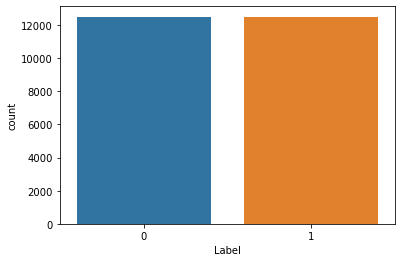

In [4]:
sns.countplot(x='Label',data=train_data)

In [4]:
#X = train_data['Content'].head(10000)
#y = train_data['Label'].head(10000)
X = train_data['Content']
y = train_data['Label']
X = np.array(X).flatten()
y = np.array(y).flatten()

In [5]:
import re
from nltk import ngrams

stopWords = []
stopWords.extend(['saying', 'said', 'say', 'yes', 'instead', 'meanwhile', 'now', 'one', 'suggested', 'says', 'added','know', 'though', 'let', 'going', 'back',
                       'well', 'example', 'us', 'yet', 'perhaps', 'actually', 'year', 'lastyear','maybe', 'ask', '.', ',', ':', 'take', 'n\'t', 'go', 
                       'make', 'two', 'got', 'took','get', '?', 'would', '(', '\'', ')', '``', '/', "''", '%', '#', '!', "'s", ';', '[', ']', '...',
                       "'m", "'d", 'also', 'something', 'even', 'new', 'lot', 'a', 'thing', 'time', 'way','whose', 'people', 'come'])

stopWords.extend([' ','are','and','I','A','And','So','This','When','It','so','These','these'])
stopWords.extend(more_stop_words)

### Method 1: Machine Learning

In [6]:
#nltk.download('stopwords')
#stopWords = stopwords.words('english')
#from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')

def processText(text):    
    p_stemmer = SnowballStemmer(language='english')
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r" can't ", " can not ", text, flags=re.IGNORECASE)
    text = re.sub(r" cannot ", " can not ", text, flags=re.IGNORECASE)
    text = re.sub(r" isn't ", " is not ", text, flags=re.IGNORECASE)
    text = re.sub(r" ain't ", " is not ", text, flags=re.IGNORECASE)
    text = re.sub(r" aint ", " is not ", text, flags=re.IGNORECASE)
    text = re.sub(r" aint' ", " is not ", text, flags=re.IGNORECASE)
    text = re.sub(r" aren't ", " are not ", text, flags=re.IGNORECASE)
    text = re.sub(r" mustn't ", " must not ", text, flags=re.IGNORECASE)
    text = re.sub(r" shouldn't ", " should not ", text, flags=re.IGNORECASE)
    text = re.sub(r" terrible ", " awful ", text, flags=re.IGNORECASE)
    tokens = text.lower()
    tokens = tokens.split()
    #tokens = [wrd for wrd in tokens if(wrd not in stopWords)]
    #lemmatizer = WordNetLemmatizer()
    #tokens = [lemmatizer.lemmatize(t) for t in tokens]
    #tokens = [wrd for wrd in tokens if(wrd not in stopWords)]
    stems = [p_stemmer.stem(t) for t in tokens]
    #stems = ' '.join(stems)
    #stems = ngrams(stems,3)
    return stems


vectorizer = TfidfVectorizer(tokenizer=processText, stop_words = stopWords,use_idf=True)
#vectorizer = TfidfVectorizer(tokenizer=processText, stop_words = 'english',max_df=0.9, min_df=3)


nb = SVC(kernel='rbf',C=8,gamma=0.1)    
#nb = KNeighborsClassifier(n_neighbors=3)
#nb = ComplementNB()

estimators = [("tf_idf",vectorizer),("svm",nb)]
model = Pipeline(estimators)

kf = KFold(n_splits=5)

accuracy,precision,recall,f1 = 0,0,0,0

for trainI,testI in kf.split(X):
    #kfTestCategIds = le.transform(y[testI])
    model.fit(X[trainI],y[trainI])
    predictions = model.predict(X[testI])
    
    ret = precision_score(y[testI], predictions, average='macro')
    precision += ret

    ret = recall_score(y[testI], predictions, average='macro')
    recall += ret

    ret = f1_score(y[testI], predictions, average='macro')
    f1 += ret

    accuracy += accuracy_score(y[testI], predictions)
    
#accuracy,precision,recall,f1 = accuracy/float(5),precision/float(5),recall/float(5),f1/float(5)
accuracy,precision,recall,f1 = accuracy/5,precision/5,recall/5,f1/5
print("Accuracy = ",end=' ')
print(accuracy)
print("Precision = ",end=' ')
print(precision)
print("Recall = ",end=' ')
print(recall)
print("f1-score = ",end=' ')
print(f1)

c:\python\python37\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['accord', 'actual', 'ad', 'd', 'exampl', 'i', 'it', 'm', 'mayb', 'meanwhil', 'nt', 'peopl', 'perhap', 's', 'someth', 'suggest', 'this', 'when'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Accuracy =  0.89184
Precision =  0.8920063357556798
Recall =  0.891880753937008
f1-score =  0.8918126858756633


### Deep Learning

In [9]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, GlobalMaxPool1D, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


def processText2(text):    
    p_stemmer = SnowballStemmer(language='english')
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub(r" can't ", " can not ", text, flags=re.IGNORECASE)
    text = re.sub(r" cannot ", " can not ", text, flags=re.IGNORECASE)
    text = re.sub(r" isn't ", " is not ", text, flags=re.IGNORECASE)
    text = re.sub(r" ain't ", " is not ", text, flags=re.IGNORECASE)
    text = re.sub(r" aint ", " is not ", text, flags=re.IGNORECASE)
    text = re.sub(r" aint' ", " is not ", text, flags=re.IGNORECASE)
    text = re.sub(r" aren't ", " are not ", text, flags=re.IGNORECASE)
    text = re.sub(r" mustn't ", " must not ", text, flags=re.IGNORECASE)
    text = re.sub(r" shouldn't ", " should not ", text, flags=re.IGNORECASE)
    text = re.sub(r" terrible ", " awful ", text, flags=re.IGNORECASE)
    tokens = text.lower()
    tokens = tokens.split()
    stems = [p_stemmer.stem(t) for t in tokens]
    stems = [wrd for wrd in stems if(wrd not in stopWords)]
    stems = ' '.join(stems)
    return stems

temp_train = train_data['Content']
#for i in temp_train:
#    i = processText2(i)

X_train = temp_train.map(processText2)
y = train_data['Label']
    
#X = np.array(temp_train).flatten()
#y = np.array(train_data['Label'].head(10000)).flatten()

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X)
X_train_seq = pd.Series(tokenizer.texts_to_sequences(X))
X_train_pad = pad_sequences(X_train_seq)
    
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=32))
model.add(LSTM(32, return_sequences=True))
model.add(GlobalMaxPool1D())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

epochs = 2
batch_size = 32

In [10]:
accuracy,precision,recall,f1 = 0,0,0,0
kf = KFold(n_splits=5)

#X = np.array(X_train_pad).flatten()
#y = np.array(y).flatten

#model.fit(x=X_train_pad, y=y, batch_size=batch_size, epochs=epochs, validation_split=0.01)

for trainI,testI in kf.split(X):
    #kfTestCategIds = le.transform(y[testI])
    model.fit(X_train_pad[trainI], y[trainI], batch_size=batch_size, epochs=epochs,verbose=2)
    predictions = model.predict_classes(X_train_pad[testI])
    
    ret = precision_score(y[testI], predictions, average='macro')
    precision += ret

    ret = recall_score(y[testI], predictions, average='macro')
    recall += ret

    ret = f1_score(y[testI], predictions, average='macro')
    f1 += ret

    accuracy += accuracy_score(y[testI], predictions)
    
#accuracy,precision,recall,f1 = accuracy/float(5),precision/float(5),recall/float(5),f1/float(5)
accuracy,precision,recall,f1 = accuracy/5,precision/5,recall/5,f1/5
print("Accuracy = ",end=' ')
print(accuracy)
print("Precision = ",end=' ')
print(precision)
print("Recall = ",end=' ')
print(recall)
print("f1-score = ",end=' ')
print(f1)

Epoch 1/2
 - 380s - loss: 0.4701 - accuracy: 0.7714
Epoch 2/2
 - 381s - loss: 0.2467 - accuracy: 0.9105
Epoch 1/2
 - 380s - loss: 0.2046 - accuracy: 0.9278
Epoch 2/2
 - 385s - loss: 0.1416 - accuracy: 0.9528
Epoch 1/2
 - 381s - loss: 0.1295 - accuracy: 0.9588
Epoch 2/2
 - 381s - loss: 0.0834 - accuracy: 0.9765
Epoch 1/2
 - 381s - loss: 0.0836 - accuracy: 0.9754
Epoch 2/2
 - 381s - loss: 0.0524 - accuracy: 0.9853
Epoch 1/2
 - 381s - loss: 0.0523 - accuracy: 0.9851
Epoch 2/2
 - 382s - loss: 0.0336 - accuracy: 0.9913
Accuracy =  0.9437199999999999
Precision =  0.9444293608727607
Recall =  0.9436854828686458
f1-score =  0.943655735634399


In [11]:
test_data = test_data['Content']
test_data.map(processText2)

#tokenizer = Tokenizer(num_words=6000)
tokenizer.fit_on_texts(test_data)
X_test_seq = pd.Series(tokenizer.texts_to_sequences(test_data))
X_test_pad = pad_sequences(X_test_seq)

In [12]:
pred_final = model.predict_classes(X_test_pad)

In [13]:
test_data = pd.read_csv('datasets/q3/test_without_labels.csv', sep=',')
to_print_arr = np.array(test_data[['Id']]).flatten()
columns = pd.Index(['Id','Predicted'])
data = np.column_stack((to_print_arr,pred_final))
df_final = pd.DataFrame(data, index=None, columns = columns)
df_final.to_csv('q3/sentiment_predictions.csv', sep=',', index=False)

### End of Requirement3